使用 odeint

In [5]:
from scipy.integrate import odeint
import numpy as np
from scipy.integrate import solve_ivp
from vehiclemodels.init_ks import init_ks
from vehiclemodels.parameters_vehicle1 import parameters_vehicle1
from vehiclemodels.vehicle_dynamics_ks import vehicle_dynamics_ks

def func_KS(x, t, u, p):
    f = vehicle_dynamics_ks(x, u, p)
    return f

tStart = 0  # start time
tFinal = 1  # start time

# load vehicle parameters
p = parameters_vehicle1()

# initial state for simulation
delta0 = 3
vel0 = 15
Psi0 = 0
sy0 = 0
initialState = [0, sy0, delta0, vel0, Psi0]
x0_KS = init_ks(initialState)

t = np.arange(0, tFinal, 0.01)
u = [0, 5]

# 1. 使用odeint
x = odeint(func_KS, x0_KS, t, args=(u, p))

# print(len(x))
# print(x[0]) 
                    
                    
len(x), len(x[0]), x[7]

(100,
 5,
 array([ 1.05817927, -0.03338819,  3.        , 15.25305052, -0.06308403]))

使用solve_ivp

In [8]:
from scipy.integrate import solve_ivp
import numpy as np
from vehiclemodels.init_ks import init_ks
from vehiclemodels.parameters_vehicle1 import parameters_vehicle1
from vehiclemodels.vehicle_dynamics_ks import vehicle_dynamics_ks

# 修改 func_KS 以适配 solve_ivp
def func_KS(t, x, u, p):
    f = vehicle_dynamics_ks(x, u, p)
    return f

tStart = 0  # start time
tFinal = 1  # end time

# Load vehicle parameters
p = parameters_vehicle1()

# Initial state for simulation
delta0 = 3
vel0 = 15
Psi0 = 0
sy0 = 0
initialState = [0, sy0, delta0, vel0, Psi0]
x0_KS = init_ks(initialState)

# Time array for evaluation points
t_eval = np.arange(0, tFinal, 0.01)

# Control input
u = [0, 5]

# 使用 solve_ivp 进行仿真
x_next = solve_ivp(func_KS, [tStart, tFinal], x0_KS, args=(u, p), method='LSODA', t_eval=t_eval)

# x_next.y 包含每个时间步的结果
x = x_next.y.T

# 查看结果
len(x), len(x[0]), x[7]


(100,
 5,
 array([ 1.05818135, -0.0333851 ,  3.        , 15.25305032, -0.06308404]))

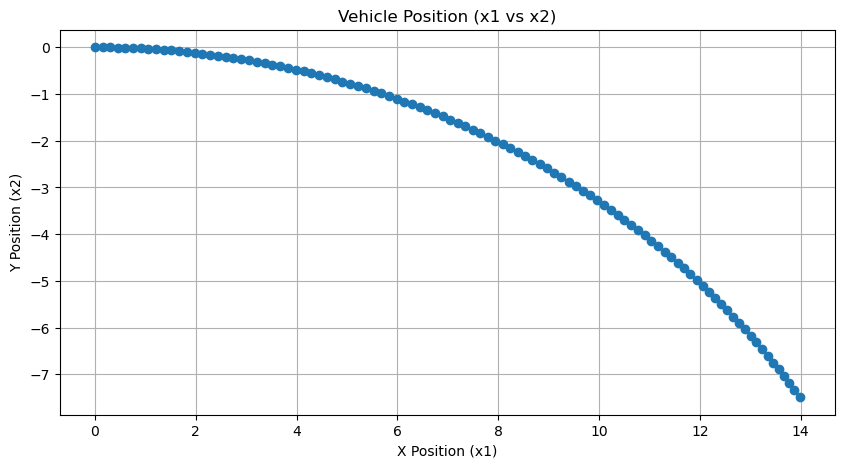

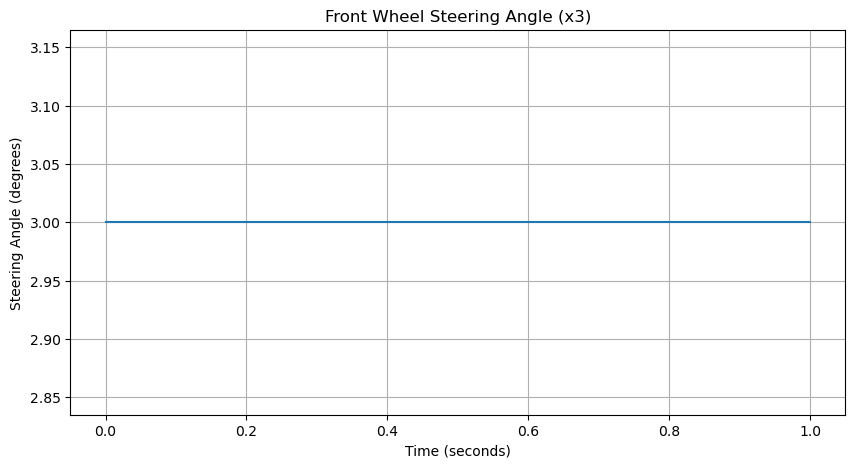

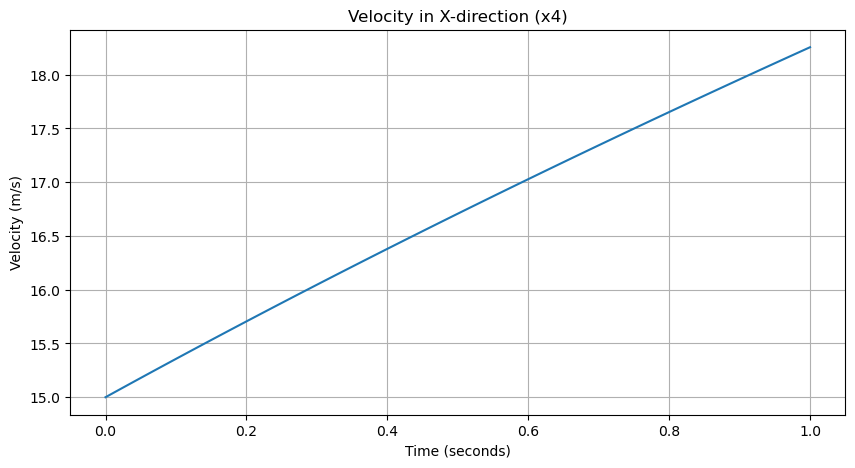

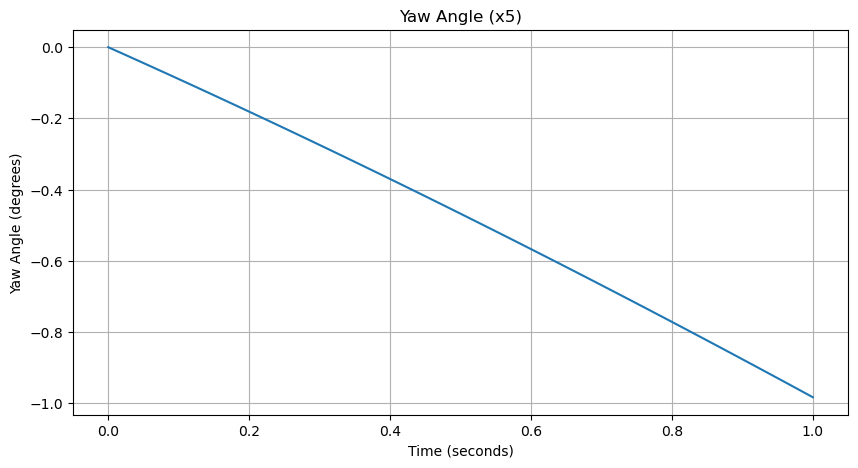

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 模拟的时间数组
t = np.linspace(0, 1, 100)  # 从 0 到 1 秒，共 100 个点

# 假设 x 已经是你通过 odeint 得到的结果数组
# x.shape 应该是 (100, 5)，假设它包含了上述提到的每个状态变量

# 绘制位置坐标图 (x1 vs x2)
plt.figure(figsize=(10, 5))
plt.plot(x[:, 0], x[:, 1], marker='o', linestyle='-')
plt.title('Vehicle Position (x1 vs x2)')
plt.xlabel('X Position (x1)')
plt.ylabel('Y Position (x2)')
plt.grid(True)
plt.show()

# 绘制前轮转向角度 (x3)
plt.figure(figsize=(10, 5))
plt.plot(t, x[:, 2], marker='', linestyle='-')
plt.title('Front Wheel Steering Angle (x3)')
plt.xlabel('Time (seconds)')
plt.ylabel('Steering Angle (degrees)')
plt.grid(True)
plt.show()

# 绘制速度 (x4)
plt.figure(figsize=(10, 5))
plt.plot(t, x[:, 3], marker='', linestyle='-')
plt.title('Velocity in X-direction (x4)')
plt.xlabel('Time (seconds)')
plt.ylabel('Velocity (m/s)')
plt.grid(True)
plt.show()

# 绘制偏航角 (x5)
plt.figure(figsize=(10, 5))
plt.plot(t, x[:, 4], marker='', linestyle='-')
plt.title('Yaw Angle (x5)')
plt.xlabel('Time (seconds)')
plt.ylabel('Yaw Angle (degrees)')
plt.grid(True)
plt.show()
